# Logistic Regression

-----------------------------

**FORMULA FOR LOGISTIC REGRESSION**

y=log((p)/(1-p)) 

from sklearn.linear_model import LogisticRegression

*************************************************************

#### Mertics Used for Logistic Regression

1. Accuray Score
2. Confusion Matrix
3. Classification Report

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report



### NOTE: Logistic Works on 0 and 1 only NOT 1,2,3...

----------------------

## Confusion Matrix

1. ...........True Positive(TP) ............ False Negative(FN)
2. ...........False Positive(FP)............ True Negative(TP)


### Formula

1. Accuracy = (TP+TN)/(TP+FN+FP+TN)

2. Recall or Sensitivity = Tp/Tp+Fn # total positive

3. Precision=TP/TP+FP # True Positive

4. Specificity=TN/FP+TN     # Total Negative

3. F1_score= 2* ((Precision*Recall)/Precision+Recall)   

# Cancer Dataset

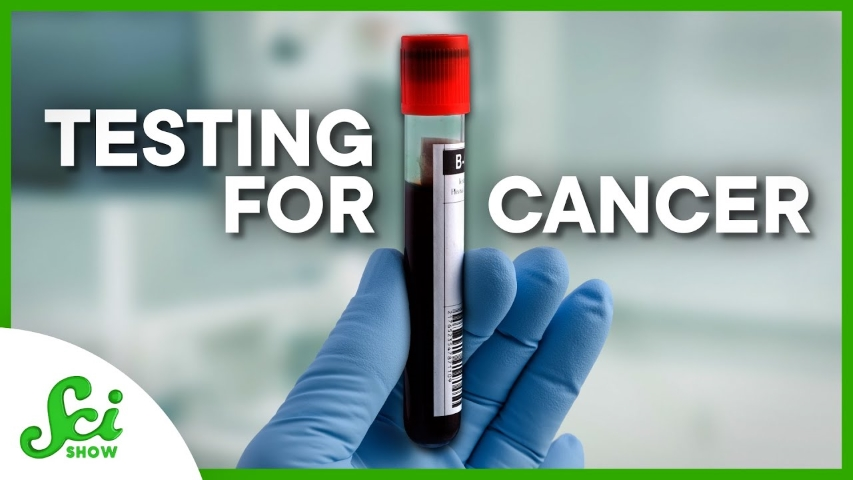

In [1]:
# importing important library
import numpy as np # numerical Python Library
import pandas as pd # data manipulation and data analysis
import seaborn as sns # library that is built on top of Matplotlib for drawing graph
import matplotlib.pyplot as plt # python library to draw 2d graph

#scientific library
import scipy
from scipy.stats import zscore # used to check and removing outliers beyond 3rd standard deviation  
from scipy.stats import ttest_ind, ttest_1samp # to compare the mean of two columns 
from scipy.stats import chi2_contingency # to perform 

# scikit Learn Library
import sklearn
from sklearn.model_selection import train_test_split # for training and testing data
from sklearn.linear_model import LogisticRegression # model used for training and testing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # metrics used to test the errors


# import warnings
import warnings
warnings.filterwarnings("ignore") # to filter update warnings

In [2]:
# loading dataset
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [3]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [5]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [7]:
df=pd.DataFrame(data=cancer.data,columns=cancer.feature_names)

# adding new column  Target
df['Target']=cancer.target

In [8]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
print("\
Shape: ",df.shape,"\nDimension: ",df.ndim,"\nSize: ",df.size)

Shape:  (569, 31) 
Dimension:  2 
Size:  17639


In [10]:
print("Cancer DataSet Information\n",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
# missing Data
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Target                     0
dtype: int64

In [12]:
# total not null rows
df.notnull().sum()

mean radius                569
mean texture               569
mean perimeter             569
mean area                  569
mean smoothness            569
mean compactness           569
mean concavity             569
mean concave points        569
mean symmetry              569
mean fractal dimension     569
radius error               569
texture error              569
perimeter error            569
area error                 569
smoothness error           569
compactness error          569
concavity error            569
concave points error       569
symmetry error             569
fractal dimension error    569
worst radius               569
worst texture              569
worst perimeter            569
worst area                 569
worst smoothness           569
worst compactness          569
worst concavity            569
worst concave points       569
worst symmetry             569
worst fractal dimension    569
Target                     569
dtype: int64

<Axes: >

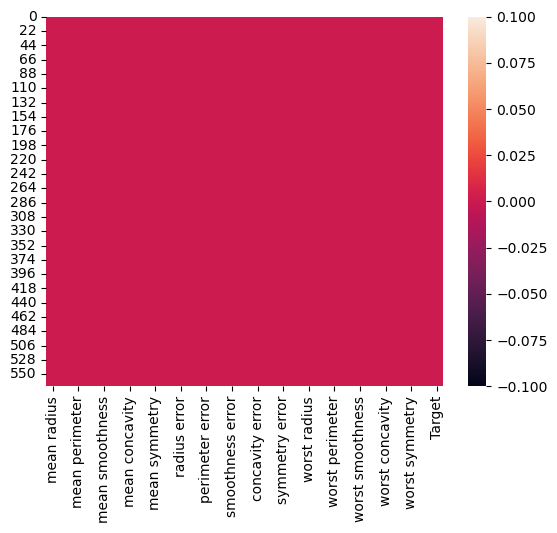

In [13]:
sns.heatmap(df.isnull())

### Statistical Analysis

In [14]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## Correlation 

Text(0.5, 1.0, 'Correlation Graph')

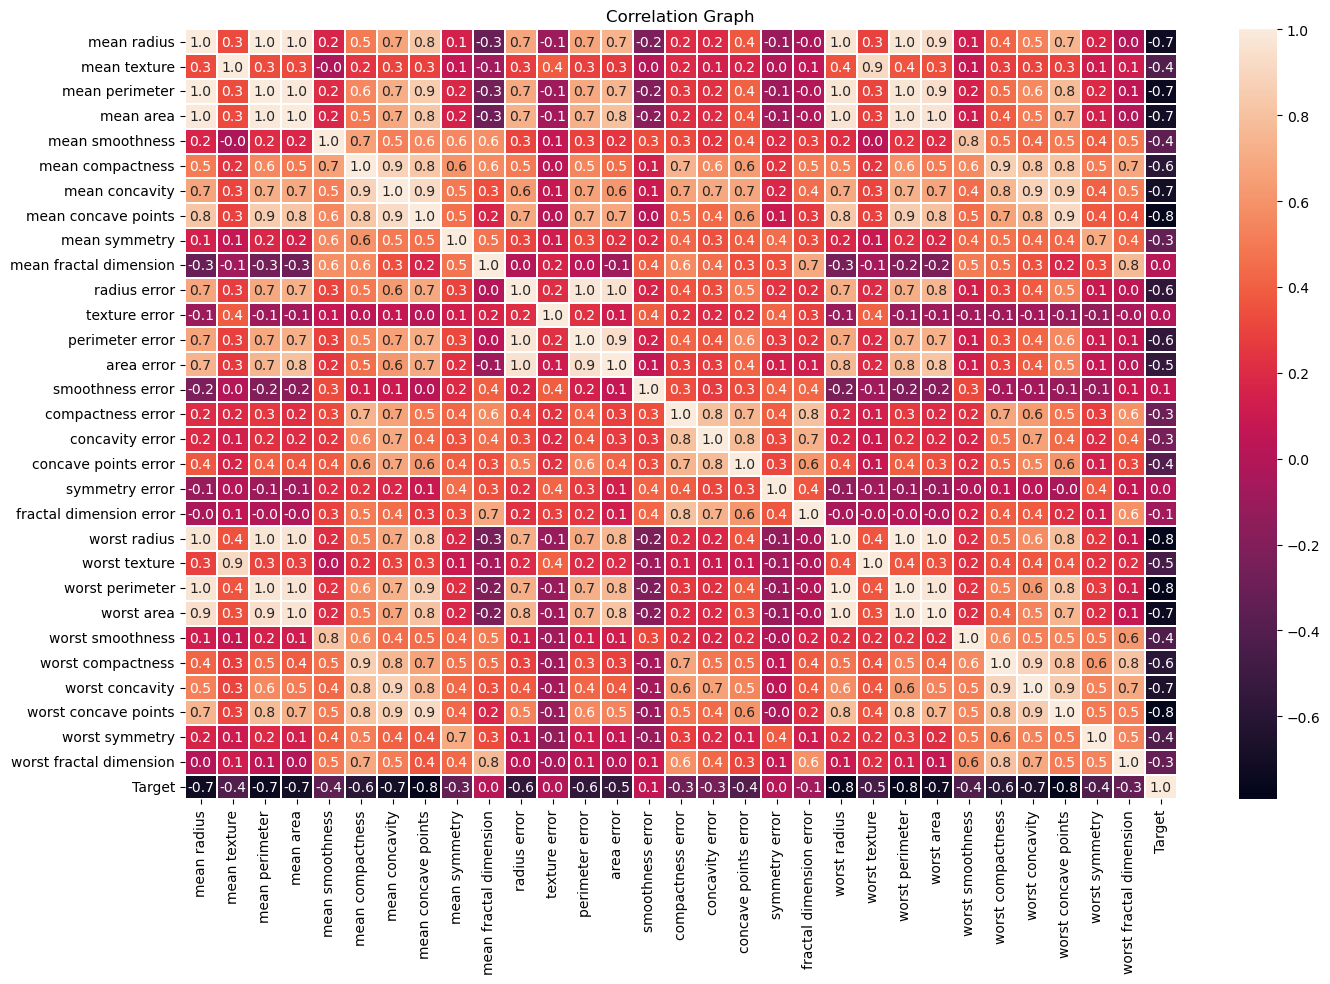

In [15]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.20,fmt="0.1f")
plt.title('Correlation Graph')

### Spliting Data into x and y

In [16]:
x=df.iloc[:,:-1]

# or
##### use... df.drop(['Target'],axis=1) for getting the x data

x.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [17]:
y=df.iloc[:,-1]
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int32

In [18]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'Target'],
      dtype='object')

<Axes: ylabel='count'>

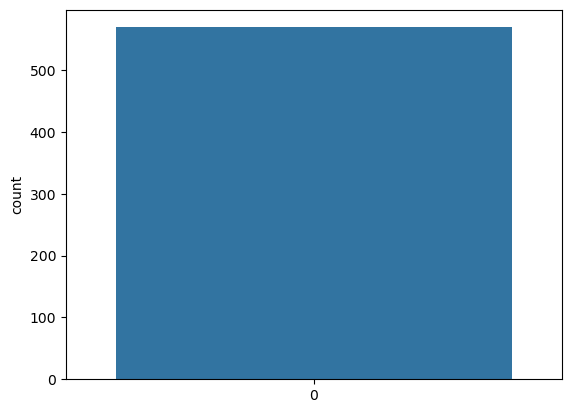

In [19]:
sns.countplot(df['Target'])

<Axes: xlabel='Target', ylabel='count'>

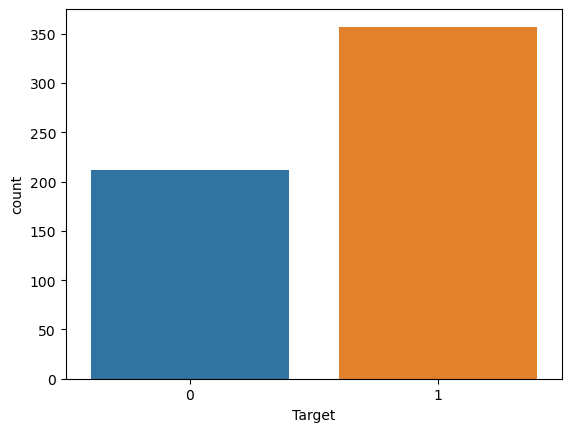

In [20]:
sns.countplot(data=df,x='Target')

## Train Test

In [21]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20,random_state=42)

In [22]:
# Training Shape
print("Training Shape...............\nTrain X: {}\nTrain Y: {}\n".format(train_x.shape,train_y.shape))

Training Shape...............
Train X: (455, 30)
Train Y: (455,)



In [23]:
# Testing Shape 
print("Testing Shape......................\nTest X: {}\nTest Y: {}".format(test_x.shape,test_y.shape))

Testing Shape......................
Test X: (114, 30)
Test Y: (114,)


- Shows 455 rows and 30 columnsfor train and  114 rows testing in x columns
- Shows 455 rows with 1 column goes for train and 114 for testing...

## Training Dataset:

In [24]:
# create instance
lg=LogisticRegression()

# train
lg.fit(train_x,train_y)

LogisticRegression()

In [25]:
# saving the test result in pred instance
pred=lg.predict(test_x)
pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [26]:
lg.score

<bound method ClassifierMixin.score of LogisticRegression()>

In [27]:
print("Accuracy_score:",accuracy_score(test_y,pred))

Accuracy_score: 0.956140350877193


In [28]:
# show matrix (testing y - predicted)
print("Confusion Matrix:\n",confusion_matrix(test_y,pred))

Confusion Matrix:
 [[39  4]
 [ 1 70]]


In [29]:
print("Classification_Report\n",classification_report(test_y,pred))

Classification_Report
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



<Axes: >

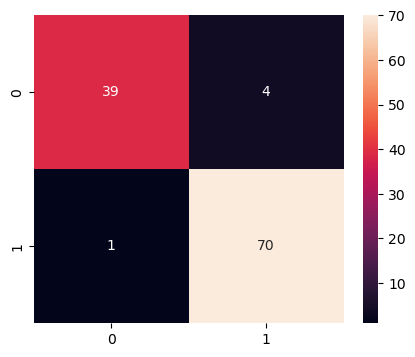

In [30]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(test_y,pred),annot=True)

# AUC ROC Curve

- AUC-ROC curve is the graphical representation of CONFUSION MATRIX

1. Represted BY:
        
        - Recall
        - Sensitivity
        - specificity

- Area under the Curve
- Receiver Operating Characterstics 

In [1]:
import pandas as pd
confusion_Matrix=pd.DataFrame(data={'True':['TP','FP'],'False':['FN','TN']},index=['True','False'])
confusion_Matrix

,True,False
True,TP,FN
False,FP,TN


### Matrix Table

{True=0,false=1}

1. 0-0 TRUE postive 
2. 1-0 False positive
3. 0-1 false negative
4. 1-1 True Negative



- Sensitivity=TPR
- 1-Specificity=FPR

In [31]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [32]:
# [:,1] # predict all and give me probability of 1 if he has cancer or not
y_pred_prob=lg.predict_proba(test_x)[:,1] # lg.predict_probe
y_pred_prob

array([8.57859837e-01, 1.65035968e-09, 1.98833542e-03, 9.94955105e-01,
       9.98878273e-01, 3.43404791e-10, 4.59444382e-13, 1.19280884e-02,
       9.98592062e-01, 9.85229223e-01, 9.29572408e-01, 4.80336779e-04,
       9.87509802e-01, 1.83459858e-01, 9.97826825e-01, 6.96778006e-04,
       9.96725132e-01, 9.99290571e-01, 9.97811708e-01, 4.64772217e-08,
       8.64252379e-01, 9.82438445e-01, 2.05966449e-10, 9.92955964e-01,
       9.82053581e-01, 9.99368273e-01, 9.96759274e-01, 9.81059458e-01,
       9.91970889e-01, 3.50466885e-09, 9.90841756e-01, 9.98758379e-01,
       9.79156420e-01, 9.77272565e-01, 9.97537433e-01, 9.94215622e-01,
       2.80258301e-03, 9.95431653e-01, 1.98559427e-06, 7.53960674e-01,
       9.96277106e-01, 1.07930730e-03, 9.98108453e-01, 9.85823730e-01,
       9.97623164e-01, 9.44427499e-01, 9.98457401e-01, 9.78162522e-01,
       9.15920334e-01, 9.95120896e-01, 4.14772242e-05, 6.81664376e-10,
       8.75038579e-01, 9.98898563e-01, 9.98246785e-01, 9.74298881e-01,
      

In [33]:
# we need to find fpr, trp, threshold

fpr,tpr,threshold=roc_curve(test_y,y_pred_prob)

In [34]:
# checking false positive rate
fpr

array([0.        , 0.        , 0.        , 0.02325581, 0.02325581,
       0.09302326, 0.09302326, 1.        ])

In [35]:
# checking the true positive rate
tpr

array([0.        , 0.01408451, 0.94366197, 0.94366197, 0.98591549,
       0.98591549, 1.        , 1.        ])

In [36]:
# check the threshold
threshold

array([1.99976526e+00, 9.99765258e-01, 8.75038579e-01, 8.64252379e-01,
       7.53960674e-01, 5.69488301e-01, 2.06503198e-01, 1.37311656e-30])

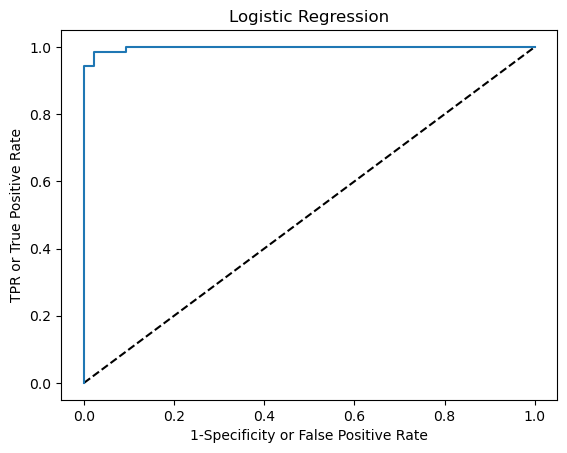

In [37]:
# graph of AUC ROC Curve

plt.plot([0,1],[0,1],'k--') # plot graph[from 0 to 1],[from 0 to 1]
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("1-Specificity or False Positive Rate")
plt.ylabel("TPR or True Positive Rate")
plt.title("Logistic Regression")
plt.show()

In [38]:
# score
auc_score=roc_auc_score(test_y,lg.predict(test_x))
auc_score

0.9464461185718965

In [39]:
from sklearn.tree import DecisionTreeClassifier

# create instance from decision tree
dtc=DecisionTreeClassifier()

# train model
dtc.fit(train_x,train_y)

# check score of training
print("Training Score :",dtc.score(train_x,train_y))

# Save the prediction on test data
pred_dtc=dtc.predict(test_x)

# checking result
print("Accuracy_score: ",accuracy_score(test_y,pred_dtc))
print("Classification Report\n-------------------------------------------\n",classification_report(test_y,pred_dtc))
print("Confusion Matrix\n------------------------------------------------\n",confusion_matrix(test_y,pred_dtc))

Training Score : 1.0
Accuracy_score:  0.9473684210526315
Classification Report
-------------------------------------------
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix
------------------------------------------------
 [[40  3]
 [ 3 68]]


### DTC model: AUC_ROC Graph

FPR or False Positive Rate
 [0.         0.06976744 1.        ] 

TPR or True Positive Rate
 [0.         0.95774648 1.        ] 

Thresholds
 [2. 1. 0.]


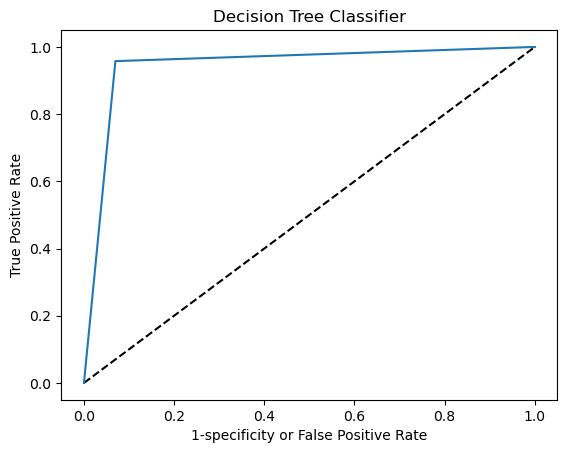

In [40]:
y_pred_prob=dtc.predict_proba(test_x)[:,1]

fpr,tpr,thresholds=roc_curve(test_y,y_pred_prob)
print("FPR or False Positive Rate\n",fpr,"\n\nTPR or True Positive Rate\n",tpr,"\n\nThresholds\n",thresholds)


# ploting graph based on data
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Decision Tree Classifier")
plt.xlabel("1-specificity or False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree Classifier")
plt.show()

In [41]:
from sklearn.metrics import roc_auc_score

auc_score=roc_auc_score(test_y,pred_dtc)
auc_score

0.9439895185063871

## SVC Machine Learning 

In [42]:
# import library
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# create instance for svc
svc=SVC(kernel='rbf',probability=True)

# training and testing
svc.fit(train_x,train_y)
print("Training Score: ",svc.score(train_x,train_y))

# getting the predicted result
pred_svc=svc.predict(test_x)

# checking the re
print("Accuracy_score: ",accuracy_score(test_y,pred_svc))
print("\nClassification_Report\n-----------------------------------------\n",classification_report(test_y,pred_svc))
print("\nConfusion Matrix\n----------------------------------------------\n",confusion_matrix(test_y,pred_svc))

Training Score:  0.9142857142857143
Accuracy_score:  0.9473684210526315

Classification_Report
-----------------------------------------
               precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114


Confusion Matrix
----------------------------------------------
 [[37  6]
 [ 0 71]]


## Auc Roc Graph

In [43]:
y_pred_probe=svc.predict_proba(test_x)[:,1]

fpr,tpr,thresholds=roc_curve(test_y,y_pred_probe)
print("FPR\n----------------------\n",fpr)
print("\n\nTPR\n------------------\n",tpr)
print("\n\nThreshold\n-----------------------------------\n",threshold)

FPR
----------------------
 [0.         0.         0.         0.04651163 0.04651163 0.09302326
 0.09302326 0.13953488 0.13953488 1.        ]


TPR
------------------
 [0.         0.01408451 0.90140845 0.90140845 0.97183099 0.97183099
 0.98591549 0.98591549 1.         1.        ]


Threshold
-----------------------------------
 [1.99976526e+00 9.99765258e-01 8.75038579e-01 8.64252379e-01
 7.53960674e-01 5.69488301e-01 2.06503198e-01 1.37311656e-30]


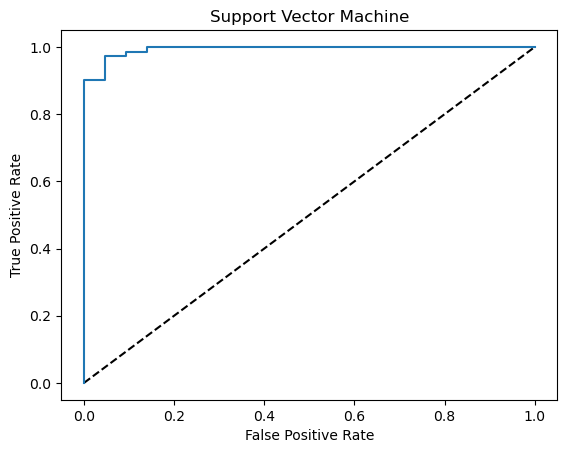

In [44]:
# graph based on fpr and tpr
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Support Vector Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Support Vector Machine")
plt.show()

In [45]:
from sklearn.metrics import roc_auc_score

score=roc_auc_score(test_y,pred_svc)
score*100

93.02325581395348

# KNeighbors Classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier

# create instance
knn =KNeighborsClassifier()

# train and test model
knn.fit(train_x,train_y)
print("Training Score: ",knn.score(train_x,train_y))

# pred test
pred_knn=knn.predict(test_x)

# Checking Errors:

print("Accuracy_Score: ",accuracy_score(test_y,pred_knn))
print("\nClassification Report\n--------------------------------------------------\n",classification_report(test_y,pred_knn))
print("\nConfusion Matrix\n--------------------------------------------------------\n",confusion_matrix(test_y,pred_knn))

Training Score:  0.9406593406593406
Accuracy_Score:  0.956140350877193

Classification Report
--------------------------------------------------
               precision    recall  f1-score   support

           0       1.00      0.88      0.94        43
           1       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix
--------------------------------------------------------
 [[38  5]
 [ 0 71]]


### AUC ROC GRAPH

In [47]:
y_pred_proba=knn.predict_proba(test_x)[:,1]

fpr,tpr,thresholds=roc_curve(test_y,y_pred_proba)
print("False Positive Rate\n-------------------------------\n",fpr)
print("\n\nTrue Positive Rate\n----------------------------\n",tpr)
print("\n\nThreshold\n------------------\n",thresholds,"\n\n")

False Positive Rate
-------------------------------
 [0.         0.         0.         0.11627907 0.1627907  0.23255814
 1.        ]


True Positive Rate
----------------------------
 [0.         0.84507042 0.92957746 1.         1.         1.
 1.        ]


Threshold
------------------
 [2.  1.  0.8 0.6 0.4 0.2 0. ] 




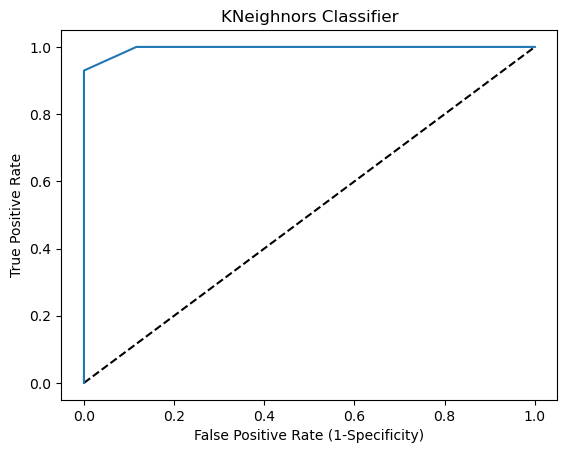

In [48]:
# ploting graph with the given data
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="KNeighbors Classifier")
plt.xlabel("False Positive Rate (1-Specificity)")
plt.ylabel("True Positive Rate")
plt.title("KNeighnors Classifier")
plt.show()

# Naive Bayes "GausianNB"